# Face recognition

In [1]:
#import libraries
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize = figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                #GRAYSCALE image to RGB image
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                #BGR image to RGB image
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
            #two images, input and detected 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            #get rid of markings
            plt.xticks([]), plt.yticks([])
        plt.show()
    else:
        if len(img.shape) <= 2:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
#initialization
known_face_encodings = []
known_face_names = []

test_image_path = 'images/test.jpg'
test_image = cv2.imread(test_image_path)

if test_image is None:
    print('The image does not exist.')
else:
    print('Image loading complete.')

Image loading complete.


In [4]:
#put border and name 
def draw_label(input_image, coordinates, label):
    image = input_image.copy()
    (top, right, bottom, left) = coordinates
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 5)
    cv2.putText(image, label, (left - 10, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)    
    return image

In [5]:
def add_known_face(face_image_path, name):
    #read the image 
    face_image = cv2.imread(face_image_path)
    #usage of face_recognition library
    face_location = face_recognition.face_locations(face_image)[0]
    face_encoding = face_recognition.face_encodings(face_image)[0]
    
    detected_face_image = draw_label(face_image, face_location, name)
    
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)
    
    #use plt_imshow def
    plt_imshow(["Input Image", "Detected Face"], [face_image, detected_face_image])

In [6]:
#extracting faces only (for checking)
from PIL import Image
image = face_recognition.load_image_file('images/Seyeon.jpg')
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location

    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

In [7]:
import face_recognition
image = face_recognition.load_image_file("images/Seyeon.jpg")
face_locations = face_recognition.face_locations(image)
face_locations

[(139, 304, 325, 118)]

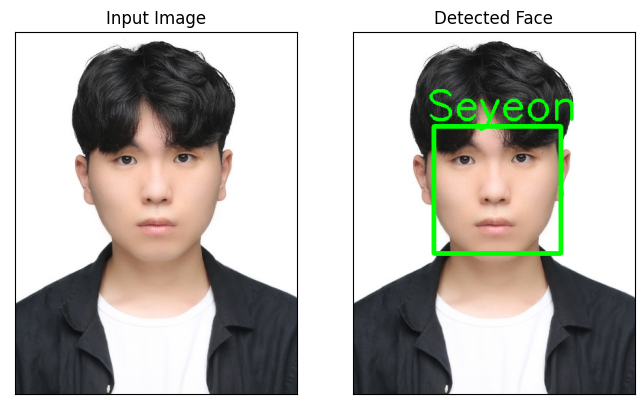

In [8]:
add_known_face("images/Seyeon.jpg", "Seyeon")

In [10]:
#for tests, put all the names that have been recognized 
def name_labeling(input_image):
    verified = 0 #false = 0 
    image = input_image.copy()
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)
    
    face_names = []
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.5)
        name = "Unknown"

        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)

        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            verified = 1 #true = 1
        
        face_names.append(name)
        
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if name != "Unknown":
            #red
            color = (0, 255, 0)
        else:
            #green
            color = (0, 0, 255)
        
        #face border
        cv2.rectangle(image, (left, top), (right, bottom), color, 1)
        cv2.rectangle(image, (left, bottom - 10), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left + 3, bottom - 3), font, 0.2, (0, 0, 0), 1)
        
    plt_imshow("Output", image, figsize=(24, 15))
    return verified

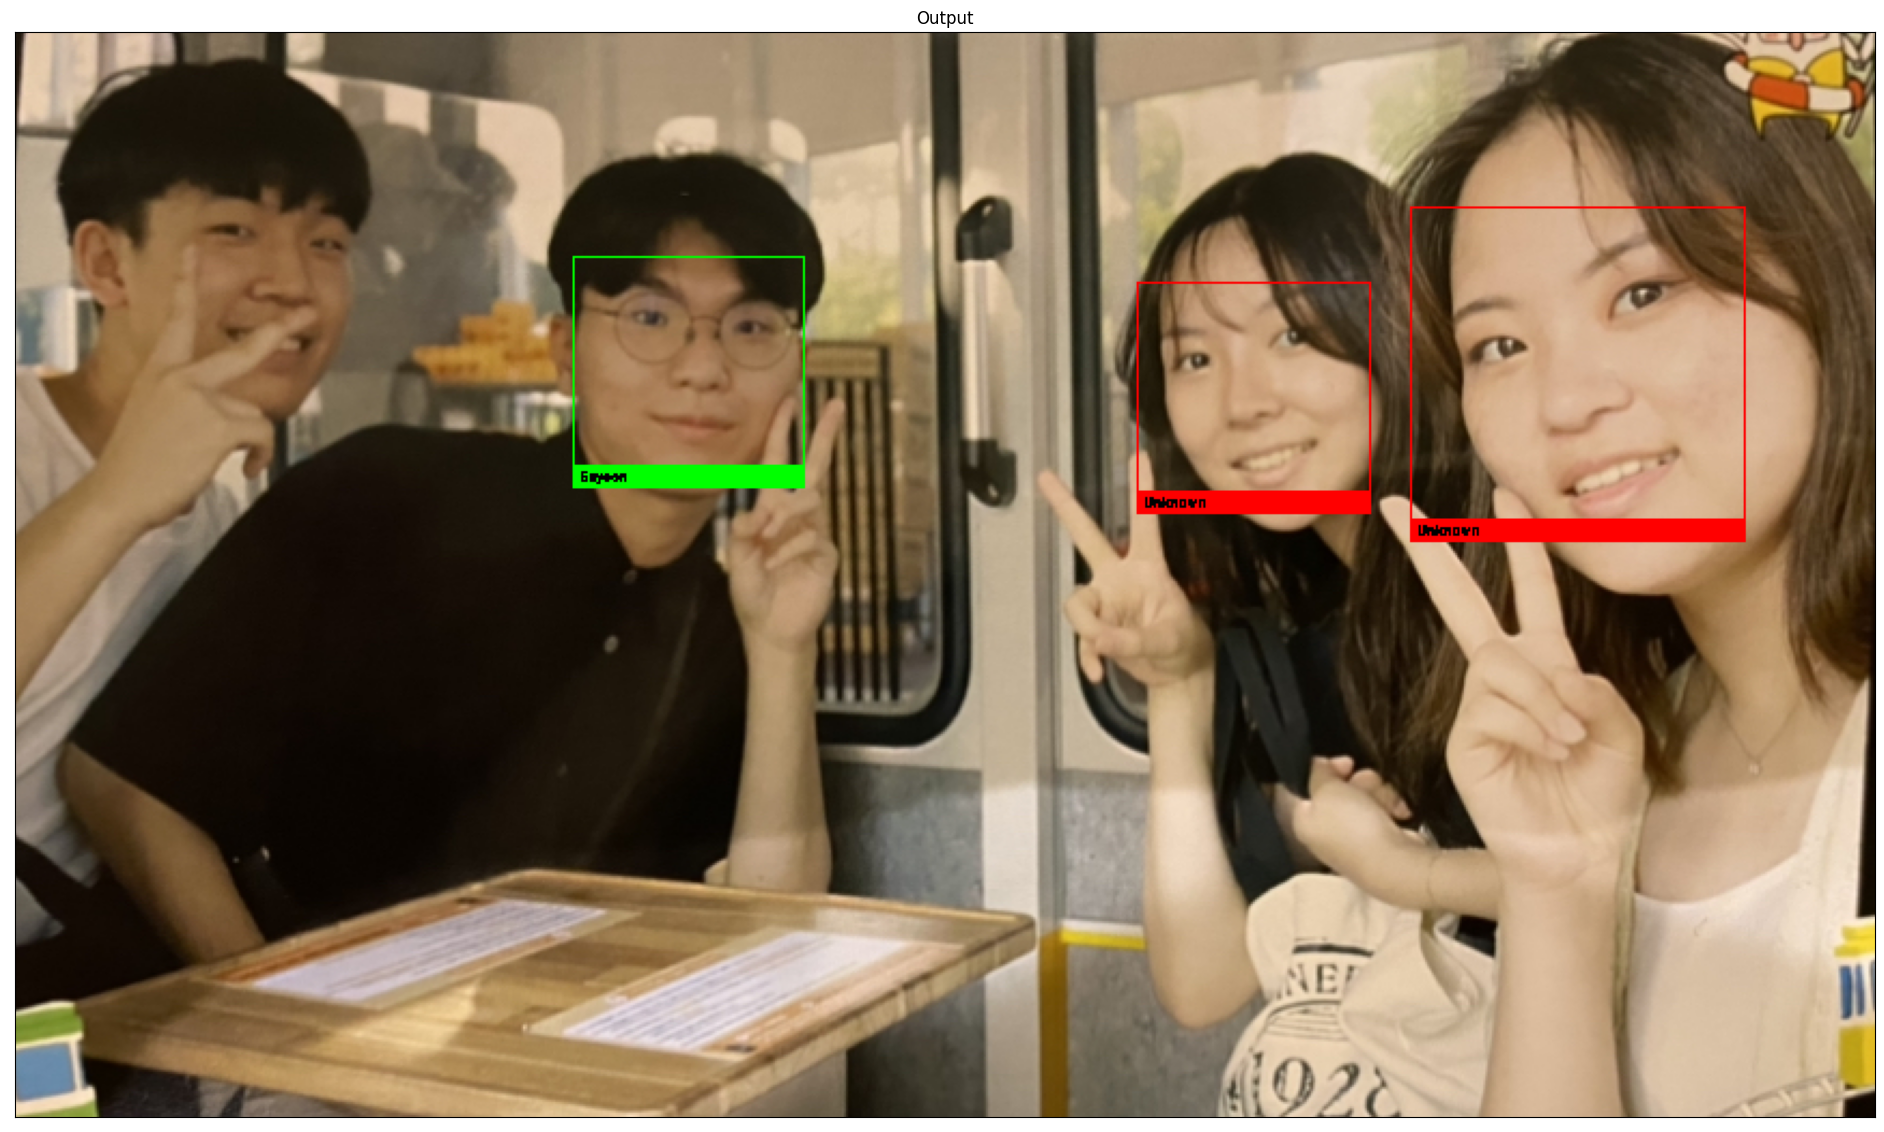

1

In [11]:
name_labeling(test_image)